In [1]:
import numpy as np
from scipy import linalg as la
from scipy import stats
from matplotlib import pyplot as plt

# Problem 1
def ball_volume(n, N=10000):
    """Estimate the volume of the n-dimensional unit ball.

    Parameters:
        n (int): The dimension of the ball. n=2 corresponds to the unit circle,
            n=3 corresponds to the unit sphere, and so on.
        N (int): The number of random points to sample.

    Returns:
        (float): An estimate for the volume of the n-dimensional unit ball.
    """
    points = np.random.uniform(-1, 1, (n, N))       #take a random draw of the specified number of the specified domain
    lengths = la.norm(points, axis=0)               #calculate the distance from the origin of each of our points
    num_within = np.count_nonzero(lengths < 1)      #find the number of points within the unit ball
    vol = 2**n * (num_within / N)                   #multiply the volume of the shape with each side of length 1 with the ratio of points within the unit ball
    return vol

def test1():
    print(ball_volume(2, 15000))
    print(ball_volume(3, 20000))
test1()

3.1202666666666667
4.2072


In [2]:
# Problem 2
def mc_integrate1d(f, a, b, N=10000):
    """Approximate the integral of f on the interval [a,b].

    Parameters:
        f (function): the function to integrate. Accepts and returns scalars.
        a (float): the lower bound of interval of integration.
        b (float): the lower bound of interval of integration.
        N (int): The number of random points to sample.

    Returns:
        (float): An approximation of the integral of f over [a,b].

    Example:
        >>> f = lambda x: x**2
        >>> mc_integrate1d(f, -4, 2)    # Integrate from -4 to 2.
        23.734810301138324              # The true value is 24.
    """
    points = np.random.uniform(a, b, N)             #draw N random points from a to b
    evals = f(points)                               #evaluate the function at the points
    summation = np.sum(evals) 
    return (b - a) * summation * (1 / N)            #use montecarlo formula to get an estimate of the integral

def test2():
    f = lambda x: x**2
    print(mc_integrate1d(f, -4, 2))
test2()

23.822881633949034


In [3]:
# Problem 3
def mc_integrate(f, mins, maxs, N=10000):
    """Approximate the integral of f over the box defined by mins and maxs.

    Parameters:
        f (function): The function to integrate. Accepts and returns
            1-D NumPy arrays of length n.
        mins (list): the lower bounds of integration.
        maxs (list): the upper bounds of integration.
        N (int): The number of random points to sample.

    Returns:
        (float): An approximation of the integral of f over the domain.

    Example:
        # Define f(x,y) = 3x - 4y + y^2. Inputs are grouped into an array.
        >>> f = lambda x: 3*x[0] - 4*x[1] + x[1]**2

        # Integrate over the box [1,3]x[-2,1].
        >>> mc_integrate(f, [1, -2], [3, 1])
        53.562651072181225              # The true value is 54.
    """
    mins = np.array(mins)                               #convert maxs and mins to numpy arrays so we can broadcast
    maxs = np.array(maxs)
    dim = len(mins)                                     #get the dimension in which we are working
    points = np.random.uniform(0, 1, (dim, N))          #draw N points from 0 to 1 in the specified dimension and convert these points using the given formula
    points = points.T * (maxs - mins) + mins
    vol = np.product(maxs - mins)                       #calculate the volume

    evals = [f(sample) for sample in points]            #evaluate the function on the points
    return vol * (1 / N) * np.sum(evals)                #use montecarlo formula to estimate the integral

def test3():
    f = lambda x: 3*x[0] - 4*x[1] + x[1]**2
    print(mc_integrate(f, [1, -2], [3, 1]))

test3()

54.30042128891807


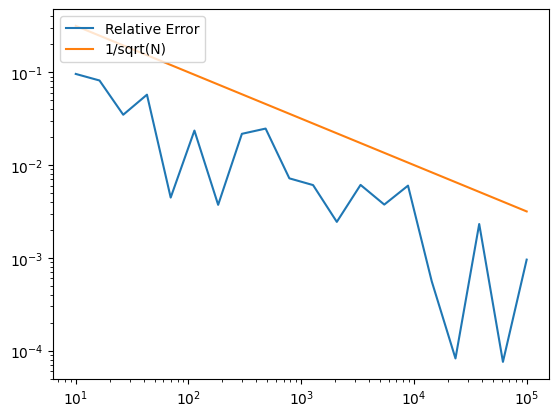

In [5]:
# Problem 4
def prob4():
    """Let n=4 and Omega = [-3/2,3/4]x[0,1]x[0,1/2]x[0,1].
    - Define the joint distribution f of n standard normal random variables.
    - Use SciPy to integrate f over Omega.
    - Get 20 integer values of N that are roughly logarithmically spaced from
        10**1 to 10**5. For each value of N, use mc_integrate() to compute
        estimates of the integral of f over Omega with N samples. Compute the
        relative error of estimate.
    - Plot the relative error against the sample size N on a log-log scale.
        Also plot the line 1 / sqrt(N) for comparison.
    """
    mins = [-3/2, 0, 0, 0]                 #define the min and max values
    maxs = [3/4, 1, 1/2, 1]
    errs = []

    f = lambda x: (1 / ((2*np.pi)**2)) * np.exp(-1 * (x @ x) / 2)      #define the joint density function 

    means, cov = np.zeros(4), np.eye(4)
    act_int = stats.mvn.mvnun(mins, maxs, means, cov)[0]               #calculate the actual integral of the function

    ns = np.logspace(1, 5, 20)

    for n in ns:
        est_int = mc_integrate(f, mins, maxs, int(n))                  #use montecarlo to get an estimate of the integral
        errs.append(np.abs(act_int - est_int) / np.abs(act_int))       #calculate the relative error of each estimate

    plt.loglog(ns, errs, base=10, label="Relative Error")
    plt.loglog(ns, 1/np.sqrt(ns), base=10, label="1/sqrt(N)")          #plot on loglog scale
    plt.legend(loc='upper left')
    plt.show()
prob4()